# Четвёртое домашнее задание
https://docs.google.com/document/d/1z35Z-xctrrYO8r6KD10w8daKCLEMkCBQW9iNk2nEskk

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем данные

In [2]:
with open('data/AnnaKarenina.txt', 'r') as f:
    karenina = f.read()
    
with open('data/WarAndPeace.txt', 'r') as f:
    wap = f.read()
    
with open('data/WarAndPeaceEng.txt', 'r', encoding='utf-8-sig') as f:
    wap_en = f.read()

In [3]:
len(karenina), karenina[:50]

(1813200, 'Annotation\n\n\n«Анна Каренина», один из самых знамен')

In [4]:
len(wap), wap[:50]

(717873, 'Annotation\n\n\n\t"Война и мир" – самый известный рома')

In [5]:
len(wap_en), wap_en[:50]

(3226614, 'The Project Gutenberg EBook of War and Peace, by L')

In [6]:
whitespaces = re.compile(r'\s+')
ru_deny = re.compile(r'[^а-яё ]')
en_deny = re.compile(r'[^a-z ]')

def cleanse(text, lang):
    text = text.lower()
    text = whitespaces.sub(' ', text)
    if lang == 'ru':
        text = ru_deny.sub(' ', text)
    elif lang == 'en':
        text = en_deny.sub(' ', text)
    else:
        raise ValueError(f'Language "{lang}" is not supported')
    text = whitespaces.sub(' ', text)
    return text

In [7]:
karenina = cleanse(karenina, 'ru')
len(karenina), karenina[:50]

(1695003, ' анна каренина один из самых знаменитых романов ль')

In [8]:
wap = cleanse(wap, 'ru')
len(wap), wap[:50]

(643550, ' война и мир самый известный роман льва николаевич')

In [9]:
wap_en = cleanse(wap_en, 'en')
len(wap_en), wap_en[:50]

(3108249, 'the project gutenberg ebook of war and peace by le')

## Подсчитываем статистики

In [10]:
from collections.abc import Iterable
from collections import Counter
from nltk.util import ngrams
import itertools

class Statistics:
    def __init__(self):
        self.char_counter = Counter()
        self.bigram_counter = Counter()
        self.chars = []
        self.bigrams = []
        self.char_probas = []
        self.bigram_probas = []
        self.char_total_count = 0
        self.bigram_total_count = 0
    
    def fit(self, corpora):
        if isinstance(corpora, Iterable) and type(corpora) is not str:
            corpora = ' '.join(corpora)
        
        self.char_counter.update(corpora)
        self.chars, self.char_probas = zip(*self.char_counter.most_common())
        self.char_probas = np.array(self.char_probas, dtype=np.float)
        self.char_total_count = self.char_probas.sum()
        self.char_probas /= self.char_total_count
        
        bigrams = ngrams(corpora, 2)
        self.bigram_counter.update(bigrams)
        self.bigrams, self.bigram_probas = zip(*self.bigram_counter.most_common())
        self.bigram_probas = np.array(self.bigram_probas, dtype=np.float)
        self.bigram_total_count = self.bigram_probas.sum()
        self.bigram_probas /= self.bigram_total_count
        
        return self
    
    def print_chars(self, top=None):
        for c, p in itertools.islice(zip(self.chars, self.char_probas), top):
            print(f'"{c}" {p}')
    
    def print_bigrams(self, top=20):
        for b, p in itertools.islice(zip(self.bigrams, self.bigram_probas), top):
            print(f'"{b}" {p}')
    
    def get_char_proba(self, char):
        return self.char_counter[char] / self.char_total_count
    
    def get_bigram_proba(self, bigram):
        return self.bigram_counter[bigram] / self.bigram_total_count

In [11]:
ru_stat = Statistics().fit([karenina, wap])

In [12]:
ru_stat.print_chars()

" " 0.1659072230104586
"о" 0.09565355343515694
"е" 0.07105630231330985
"а" 0.06940742014082206
"н" 0.05698307586653975
"и" 0.05546675424215135
"т" 0.04928601178334988
"с" 0.04415207003986224
"л" 0.041987912188472025
"в" 0.039077994350354965
"р" 0.03457649470570275
"к" 0.028987143337293044
"д" 0.02480977561347739
"м" 0.024146117643637905
"у" 0.022912876931642373
"п" 0.02049984734156235
"я" 0.01835364930636624
"ь" 0.016399450258578592
"г" 0.01576615293040058
"ы" 0.015585271924445619
"б" 0.014550872034599158
"з" 0.013992834888567892
"ч" 0.013344571046894791
"ж" 0.009185163139273244
"й" 0.009010696353387606
"ш" 0.007337012529965098
"х" 0.00666480226669985
"ю" 0.005262653759545428
"э" 0.0028427823347247916
"ц" 0.002639237751191548
"щ" 0.0023809584897333995
"ф" 0.001278567867152095
"ъ" 0.00029719219654538657
"ё" 0.00019755797813520663


In [13]:
ru_stat.print_bigrams()

"('о', ' ')" 0.023191263999575808
"('а', ' ')" 0.01808981878965326
"('и', ' ')" 0.01798890168407558
"('е', ' ')" 0.017958113414577304
"(' ', 'с')" 0.015914542026629286
"(' ', 'н')" 0.015911121107796147
"(' ', 'в')" 0.014828400297106801
"(' ', 'п')" 0.014375128551715527
"('т', 'о')" 0.013959914528342955
"(' ', 'о')" 0.013073041320850971
"('я', ' ')" 0.011091474086753646
"(' ', 'и')" 0.010936677509553985
"('н', 'а')" 0.01067583244852693
"('с', 'т')" 0.010400876097313168
"('ь', ' ')" 0.010372225902085606
"(' ', 'к')" 0.00957643465852602
"('н', 'е')" 0.009460123418199204
"('а', 'л')" 0.009320293360894537
"('н', 'о')" 0.009260427281314557
"('г', 'о')" 0.008465063652609113


In [14]:
en_stat = Statistics().fit(wap_en)

In [15]:
en_stat.print_chars()

" " 0.1853615974781943
"e" 0.10141819397352014
"t" 0.07284036767968075
"a" 0.06621284202134385
"o" 0.06205390880846419
"n" 0.059252974906450546
"i" 0.05607047569226275
"h" 0.0538579759858364
"s" 0.05240603310738618
"r" 0.04775293099104994
"d" 0.03805679660799376
"l" 0.0310551053020527
"u" 0.02105172397706876
"m" 0.019833031394846424
"c" 0.019825631730276436
"w" 0.019048345225881197
"f" 0.017661390705828266
"g" 0.016512834074747552
"y" 0.014884586144803714
"p" 0.014649083776750189
"b" 0.011150329333332046
"v" 0.008714231067073456
"k" 0.006573154209974812
"x" 0.0014104404119489784
"j" 0.0008281189827455908
"z" 0.000768278217092646
"q" 0.000749618193394416


In [16]:
en_stat.print_bigrams()

"('e', ' ')" 0.036247751144696305
"(' ', 't')" 0.028703629826191474
"('d', ' ')" 0.02457590256633319
"('h', 'e')" 0.024208814740651324
"('t', 'h')" 0.02372880156280966
"(' ', 'a')" 0.022507856515953682
"('s', ' ')" 0.020343614795215827
"('t', ' ')" 0.019145190473861803
"(' ', 'h')" 0.016088162849296452
"('i', 'n')" 0.015580159626902358
"('a', 'n')" 0.01470828582532668
"(' ', 's')" 0.014616272575418693
"('e', 'r')" 0.014214438487533813
"('n', ' ')" 0.013736999106892371
"(' ', 'w')" 0.013157894736842105
"('r', 'e')" 0.01147430964324597
"('n', 'd')" 0.01112234287611542
"(' ', 'o')" 0.011017782364856343
"('r', ' ')" 0.010461198720308032
"('y', ' ')" 0.010281032916292393


## Шифруем тексты

In [17]:
ru_alphabet = [' '] + list(map(chr, range(ord('а'), ord('я') + 1)))
ru_alphabet.insert(7, 'ё')
ru_alphabet = ''.join(ru_alphabet)
ru_alphabet

' абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [18]:
en_alphabet = [' '] + list(map(chr, range(ord('a'), ord('z') + 1)))
en_alphabet = ''.join(en_alphabet)
en_alphabet

' abcdefghijklmnopqrstuvwxyz'

In [19]:
class CaesarCipher:
    def __init__(self, alphabet, k=4):
        self.alphabet = alphabet
        self.shifted_alphabet = alphabet[k:] + alphabet[:k]
        self.translator = str.maketrans(self.alphabet, self.shifted_alphabet)
        self.inverse_translator = str.maketrans(self.shifted_alphabet, self.alphabet)
    
    def encode(self, text):
        return text.translate(self.translator)
    
    def decode(self, text):
        return text.translate(self.inverse_translator)

In [20]:
ru_cipher = CaesarCipher(ru_alphabet)
ru_example = cleanse('Гай Юлий Цезарь', 'ru')
print(ru_example)
ru_example_encoded = ru_cipher.encode(ru_example)
print(ru_example_encoded)
ru_example_decoded = ru_cipher.decode(ru_example_encoded)
print(ru_example_decoded)
assert ru_example_decoded == ru_example

гай юлий цезарь
жднгбпмнгъилдф 
гай юлий цезарь


In [21]:
en_cipher = CaesarCipher(en_alphabet)
en_example = cleanse('THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG', 'en')
print(en_example)
en_example_encoded = en_cipher.encode(en_example)
print(en_example_encoded)
en_example_decoded = en_cipher.decode(en_example_encoded)
print(en_example_decoded)
assert en_example_decoded == en_example

the quick brown fox jumps over the lazy dog
xliduymgodfvs rdjsadnyqtwdszivdxlidpecbdhsk
the quick brown fox jumps over the lazy dog


#### Зашифруем текст на русском
Возьмём ту же "Войну и мир", да ещё и 100000 символов, потому что иначе совсем всё плохо

In [22]:
ru_text = cleanse(wap[:100000], 'ru')
len(ru_text), ru_text[:50]

(100000, ' война и мир самый известный роман льва николаевич')

In [23]:
ru_text_encoded = ru_cipher.encode(ru_text)
ru_text_encoded[:50]

'гётнсдгмгрмфгхдрянгмлёихцсянгфтрдсгп ёдгсмотпдиёмы'

## Попробуем расшифровать, используя частоты букв

In [24]:
class CharFrequencyDecoder:
    def __init__(self, corpora_statistics):
        self.corpora_statistics = corpora_statistics
        
        # Символы корпуса, отсортированные в порядке убывания частот
        self.corpora_chars = ''.join(corpora_statistics.chars)
    
    def decode(self, text):
        text_stat = Statistics().fit(text)
        
        # Символы текста, отсортированные в порядке убывания частот
        text_chars = ''.join(text_stat.chars)
        
        min_len = min(len(text_chars), len(self.corpora_chars))
        
        translator = str.maketrans(text_chars[:min_len], self.corpora_chars[:min_len])
        return text.translate(translator)

In [25]:
def accuracy(text1, text2):
    assert len(text1) == len(text2)
    tp = sum(c1 == c2 for c1, c2 in zip(text1, text2))
    return tp / len(text1)

In [26]:
ru_char_decoder = CharFrequencyDecoder(ru_stat)

In [27]:
ru_text_decoded = ru_char_decoder.decode(ru_text_encoded)
print(accuracy(ru_text_decoded, ru_text))
ru_text_decoded[:1000]

0.75077


' вожне и дир седыж извастныж роден лгве николеавиче толстоьо кек никекоа мруьоа произваманиа писеталя отрейеат ьлубину аьо дирооцуцания и философии щте книье из резряме вачных потоду что оне обо всад о йизни и сдарти о любви и части о дуйаства и ьароизда о слева и помвиьа о вожна и дира парвыж тод знекодит с высшид обцаствод россии ваке покезены взеидоотношания дайму ромиталяди и матгди в садга ростовых световство у болконских интриьи у базуховых вачаре в селона фражлины е п шарар белы в досква и патарбурьа лав николеавич толстожчестг парвея честг орея честг тратгя лав николеавич толстож вожне и дир тод честг парвея а подастгя дож варныж реб ну что князг ьануе и лукке стели на болгша кек подастгяди федилии бонеперта нат я вес прамупраймею асли вы дна на скейата что у нес вожне асли вы аца позволита саба зецицетг вса ьемости вса уйесы щтоьо ентихристе прево я варю что он ентихрист я вес болгша на знею вы уй на мруь дож вы уй на дож варныж реб кек вы ьоворита ну змревствужта змревствужт

Не впечатляет, но при большом желании прочитать уже можно

## Теперь попробуем расшифровать, используя частоты биграмм
Реализуем жадный алгоритм, который перебирает пары биграмм из текста и из корпуса в порядке убывания их частот и связывает соответствующие символы, если нет противоречий

In [28]:
class DumbBigramDecoder:
    def __init__(self, corpora_statistics):
        self.corpora_statistics = corpora_statistics
        
        # Символы корпуса, отсортированные в порядке убывания частот
        self.corpora_chars = ''.join(corpora_statistics.chars)
        
        # Биграммы корпуса, отсортированные в порядке убывания частот
        self.corpora_bigrams = corpora_statistics.bigrams
    
    def decode(self, text):
        text_stat = Statistics().fit(text)
        
        # Символы текста, отсортированные в порядке убывания частот
        text_chars = ''.join(text_stat.chars)
        
        # Биграммы текста, отсортированные в порядке убывания частот
        text_bigrams = text_stat.bigrams
        
        tc_map = dict() # text chars -> corpora chars
        ct_map = dict() # corpora chars -> text chars
        
        for tb in text_bigrams:
            for cb in self.corpora_bigrams:
                can_tie_first = tb[0] not in tc_map and cb[0] not in ct_map
                can_tie_second = tb[1] not in tc_map and cb[1] not in ct_map
                already_tied_first = tb[0] in tc_map and tc_map[tb[0]] == cb[0]
                already_tied_second = tb[1] in tc_map and tc_map[tb[1]] == cb[1]
                if can_tie_first and (can_tie_second or already_tied_second):
                    tc_map[tb[0]] = cb[0]
                    ct_map[cb[0]] = tb[0]
                if can_tie_second and (can_tie_first or already_tied_first):
                    tc_map[tb[1]] = cb[1]
                    ct_map[cb[1]] = tb[1]            
        if len(tc_map) < len(text_chars):
            text_chars = [c for c in text_chars if c not in tc_map]
            corpora_chars = [c for c in self.corpora_chars if c not in ct_map]
            for tc, cc in zip(text_chars, corpora_chars):
                tc_map[tc] = cc
        text_chars, corpora_chars = zip(*tc_map.items())
        translator = str.maketrans(''.join(text_chars), ''.join(corpora_chars))
        return text.translate(translator)

In [29]:
ru_bigram_decoder = DumbBigramDecoder(ru_stat)

In [30]:
ru_text_decoded = ru_bigram_decoder.decode(ru_text_encoded)
print(accuracy(ru_text_decoded, ru_text))
ru_text_decoded[:1000]

0.65426


' сойпа е мер намый езсинтпый ромап льса пеколаисеча толнтого как пекакои бругои вроезсибипеи венатиля отрашаит глудепу иго мероофуфипея е ъелоноъее эта кпега ез разряба сичпых вотому что опа одо сним о шезпе е нмирте о людсе е чинте о мушинтси е гироезми о нласи е вобсеги о сойпи е мери вирсый том зпакомет н сынжем одфинтсом роннее сика воказапы сзаемоотпожипея мишбу робетиляме е битьме с нимьи ронтосых нсатоснтсо у долкопнкех ептреге у дизухосых сичира с налопи ърийлепы а в жирир далы с монкси е витирдурги лис пеколаисеч толнтойчанть вирсая чанть орая чанть тритья лис пеколаисеч толнтой сойпа е мер том чанть вирсая и воминтья мой сирпый рад пу что кпязь гипуа е лукка нтале пи дольжи как воминтьяме ъамелее допаварти пит я сан врибувришбаю инле сы мпи пи нкашити что у пан сойпа инле сы ифи возсолети ниди зафефать сни габонте сни ушаны этого аптехрента врасо я сирю что оп аптехрент я сан дольжи пи зпаю сы уш пи бруг мой сы уш пи мой сирпый рад как сы госорети пу збраснтсуйти збраснтсуйт

Стало только хуже

## MCMC на основе биграмм
Зашифрованный текст получен с помощью некоторой перестановки символов алфавита. Хочется найти такую (обратную) перестановку, что при её применении получится наиболее вероятный (с точки зрения распределения биграмм) текст:  
$$P(\text{text}|\text{permutation}) \xrightarrow[\text{permutation}]{} \max$$
Делов-то, просто переберём все $34! \approx 2.95 \cdot 10^{38}$ пере... Oh, wait.  
Используем алгоритм Метрополиса-Гастингса для аппроксимации правдоподобия $P(\text{text}|\text{permutation})$. Наш семплер будет менять местами произвольную пару (различных) символов перестановки, пары будут выбираться равновероятно. Очевидно, такой семплер симметричен, а значит для принятия или отвержения предложенной перестановки достаточно посмотреть на отношение правдоподобий:  
$$a = \frac{P(\text{text}|\text{permutation}_{\text{proposed}})}{P(\text{text}|\text{permutation}_{\text{current}})}$$  
Если $a \geq 1, $ то принимаем предложенную перестановку, иначе принимаем её с вероятностью $a.$

In [31]:
def get_random_permutation(alphabet):
    return ''.join(np.random.permutation(list(alphabet)))

In [32]:
def apply_permutation(text, alphabet, permutation):
    translator = str.maketrans(alphabet, permutation)
    return text.translate(translator)

In [33]:
def propose(permutation):
    permutation = list(permutation)
    i, j = np.random.choice(len(permutation), replace=False, size=2)
    permutation[i], permutation[j] = permutation[j], permutation[i]
    return ''.join(permutation)

In [34]:
def get_log_likelihood(text, corpus_stat):
    assert len(text) > 0
    char_epsilon = corpus_stat.char_probas[-1]
    bigram_epsilon = corpus_stat.bigram_probas[-1]
    log_likelihood = np.log(corpus_stat.get_char_proba(text[0]) or char_epsilon)
    for bigram in ngrams(text, 2):
        bigram_log_proba = np.log(corpus_stat.get_bigram_proba(bigram) or bigram_epsilon)
        log_likelihood += bigram_log_proba
    return log_likelihood

In [35]:
def mcmc(text, corpus_stat, alphabet, n_iter=10000, early_stopping_rounds=1000, verbose=True):
    permutation = get_random_permutation(alphabet)
    best_permutation = permutation
    permuted_text = apply_permutation(text, alphabet, permutation)
    log_likelihood = get_log_likelihood(permuted_text, corpus_stat)
    best_log_likelihood = log_likelihood
    ll_history = [log_likelihood]
    if verbose:
        print(f'Initial permutation "{permutation}" with log-likelihood {log_likelihood:.5f}')
    accepted = 0
    last_accepted_iter = -1
    for i in range(n_iter):
        proposed_permutation = propose(permutation)
        proposed_text = apply_permutation(text, alphabet, proposed_permutation)
        proposed_log_likelihood = get_log_likelihood(proposed_text, corpus_stat)
        if proposed_log_likelihood > log_likelihood:
            last_accepted_iter = i
            accepted += 1
            log_likelihood = proposed_log_likelihood
            ll_history.append(log_likelihood)
            permutation = proposed_permutation
            if log_likelihood > best_log_likelihood:
                best_log_likelihood = log_likelihood
                best_permutation = permutation
                if verbose:
                    print(f'{i}: found new best permutation "{permutation}" with log-likelihood {log_likelihood:.5f}')
        else:
            accept_log_proba = proposed_log_likelihood - log_likelihood
            accept_proba = np.exp(accept_log_proba)
            if np.random.rand() < accept_proba:
                last_accepted_iter = i
                accepted += 1
                log_likelihood = proposed_log_likelihood
                ll_history.append(log_likelihood)
                permutation = proposed_permutation
        if i - last_accepted_iter >= early_stopping_rounds:
            print(f'Model converged')
            break
    print(f'Accepted: {accepted}/{n_iter} ({accepted/n_iter*100}%)')
    return best_permutation, ll_history

In [36]:
best_permutation, ll_history = mcmc(ru_text_encoded, ru_stat, ru_alphabet)

Initial permutation "шнычьёрз втемпойафжщхкгцюбялъсдуиэ" with log-likelihood -1159627.65532
0: found new best permutation "шнычьёрв зтемпойафжщхкгцюбялъсдуиэ" with log-likelihood -1157274.21952
1: found new best permutation "шныжьёрв зтемпойафчщхкгцюбялъсдуиэ" with log-likelihood -1153109.37229
2: found new best permutation "жнышьёрв зтемпойафчщхкгцюбялъсдуиэ" with log-likelihood -1152515.54066
7: found new best permutation "жнышьёрв зтемпойафчщхягцюбклъсдуиэ" with log-likelihood -1147578.30421
12: found new best permutation "жнышьёрв зтъмпойафчщхягцюбклесдуиэ" with log-likelihood -1144400.86945
15: found new best permutation "жнышьёрв зтъмпойафчщхягбюцклесдуиэ" with log-likelihood -1141194.86549
17: found new best permutation "жнышьюрв зтъмпойафчщхягбёцклесдуиэ" with log-likelihood -1132780.24023
18: found new best permutation "жнырьюшв зтъмпойафчщхягбёцклесдуиэ" with log-likelihood -1128356.48083
22: found new best permutation "жнырьюшв злъмпойафчщхягбёцктесдуиэ" with log-likelihood 

867: found new best permutation "яйжые швчбоёюзрщптднамкслуэцфгхьъи" with log-likelihood -679109.74589
870: found new best permutation "яйжые швчбоёюзрщптднамкслуэцьгхфъи" with log-likelihood -678332.39575
876: found new best permutation "яйжие швчбоёюзрщптднамкслуэцьгхфъы" with log-likelihood -676103.87080
886: found new best permutation "яйжие мвчбоёюзрщптднашкслуэцьгхфъы" with log-likelihood -675284.13812
977: found new best permutation "яйжиеамвчбоёюзрщптдн шкслуэцьгхфъы" with log-likelihood -670434.41447
989: found new best permutation "яйщиеамвчбоёюзржптдн шкслуэцьгхфъы" with log-likelihood -668074.93749
1035: found new best permutation "ийщяеамвчбоёюзржптдн шкслуэцьгхфъы" with log-likelihood -666220.43093
1102: found new best permutation "рйщяеамвчбоёюзижптдн шкслуэцьгхфъы" with log-likelihood -665111.82773
1111: found new best permutation "чйщяеамврбоёюзижптдн шкслуэцьгхфъы" with log-likelihood -664237.07395
1113: found new best permutation "чйщяеамврбоёюзижштдн пкслуэцьгхфъы" 

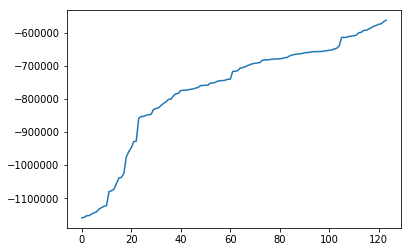

In [37]:
plt.plot(range(len(ll_history)), ll_history);

In [38]:
decoded = apply_permutation(ru_text_encoded, ru_alphabet, best_permutation)

In [39]:
print(accuracy(decoded, ru_text))
decoded[:1000]

0.95804


' война и мир самый известный роман льва ничолаевика толстого чач ничачое другое произведение писателя отражает глубину его мироощущения и философии эта чнига из разряда векных потому кто она обо всем о жизни и смерти о любви и кести о мужестве и героизме о славе и подвиге о войне и мире первый том значомит с высшим обществом россии веча почазаны взаимоотношения между родителями и детьми в семье ростовых сватовство у болчонсчих интриги у безуховых векера в салоне фрейлины а п шерер балы в мосчве и петербурге лев ничолаевик толстойкасть первая касть орая касть третья лев ничолаевик толстой война и мир том касть первая е поместья мой верный раб ну кто чнязь генуа и лучча стали не больше чач поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не счажете кто у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю кто он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб чач вы говорите ну здравствуйте здравствуйт

Получилось неплохо. Но это текст длиной 100k символов, да ещё он участвовал в подсчёте статистик. Попробуем что-нибудь посложнее

In [41]:
ru_text2 = """
Верьте аль не верьте,  а  жил  на  белом  свете  Федот-стрелец,  удалой
молодец.  Был  Федот ни красавец, ни урод, ни румян, ни бледен, ни богат, ни
беден, ни в парше, ни в парче, а так, вообче. Служба у Федота -- рыбалка  да
охота.  Царю  --  дичь  да  рыба, Федоту -- спасибо. Гостей во дворце -- как
семян в огурце. Один из Швеции, другой из Греции, третий с Гавай --  и  всем
жрать подавай! Одному -- омаров, другому -- кальмаров, третьему -- сардин, а
добытчик  один!  Как-то  раз  дают  ему  приказ: чуть свет поутру явиться ко
двору. Царь на вид сморчок, башка с кулачок, а злобности в ем --  агромадный
объем.  Смотрит  на  Федьку,  как  язвенник  на  редьку. На Федьке от страха
намокла рубаха, в висках застучало, в пузе заурчало, тут, как  говорится,  и
сказке начало...

К нам на утренний рассол
Прибыл аглицкий посол,
А у нас в дому закуски --
Полгорбушки да мосол.

Снаряжайся, братец, в путь
Да съестного нам добудь --
Глухаря аль куропатку,
Аль ишо кого-нибудь.

Не смогешь -- кого винить? --
Я должон тебя казнить.
Государственное дело --
Ты улавливаешь нить?.."""

ru_text2 = cleanse(ru_text2, 'ru')
len(ru_text2), ru_text2[:c]

(952,
 ' верьте аль не верьте а жил на белом свете федот стрелец удалой молодец был федот ни красавец ни уро')

In [43]:
ru_text_encoded2 = ru_cipher.encode(ru_text2)
ru_text_encoded2[:100]

'гёиф цигдп гсигёиф цигдгкмпгсдгеиптргхёицигшизтцгхцфипиъгчздптнгртптзиъгеяпгшизтцгсмгофдхдёиъгсмгчфт'

In [61]:
best_permutation2, ll_history2 = mcmc(ru_text_encoded2, ru_stat, ru_alphabet, n_iter=int(1e5), early_stopping_rounds=int(1e4))

Initial permutation "вй фщшзэуътюиыягечпдлжобькнёрхмацс" with log-likelihood -10459.95537
5: found new best permutation "вй фошзэуътюиыягечпдлжщбькнёрхмацс" with log-likelihood -9255.04551
6: found new best permutation "вй фошзэуътюиыягечпдлжщбьнкёрхмацс" with log-likelihood -9109.46450
7: found new best permutation "вй фошзэуътюипягечыдлжщбьнкёрхмацс" with log-likelihood -9028.62101
9: found new best permutation "ьй фошзэуътюипягечыдлжщбвнкёрхмацс" with log-likelihood -8982.39726
11: found new best permutation "ьй фошзгуътюипяэечыдлжщбвнкёрхмацс" with log-likelihood -8911.12360
18: found new best permutation "ьй фошзгуътюипяэечыдлжщбнвкёрхмацс" with log-likelihood -8878.00085
20: found new best permutation "ьй фошзгуътюипяэлчыдежщбнвкёрхмацс" with log-likelihood -8822.75590
23: found new best permutation "ьйтфошзгуъ юипяэлчыдежщбнвкёрхмацс" with log-likelihood -8671.59209
29: found new best permutation "ьктфошзгуъ юипяэлчыдежщбнвйёрхмацс" with log-likelihood -8664.68651
31: found new 

2894: found new best permutation "уъюь ебгзмоэждийвклнапрстяхщшчцёфы" with log-likelihood -5676.87251
2922: found new best permutation "уъюь ебкзмоэждийвглнапрстяхщшчцёфы" with log-likelihood -5654.22879
3001: found new best permutation "уъюь ебкздоэжмийвглнапрстяхщшчцёфы" with log-likelihood -5635.12149
3124: found new best permutation "уэюь ебкздоъчмийвглнапрстяхщшжцёфы" with log-likelihood -5629.92983
3159: found new best permutation "уэюь ебкздоъчгийвмлнапрстяхщшжцёфы" with log-likelihood -5583.11324
3253: found new best permutation "уэюь ебкздофчшийвмлнапрстяхщгжцёъы" with log-likelihood -5581.63636
3467: found new best permutation "уэюь ебкздофшчийвмлнапрстяхщгжцёъы" with log-likelihood -5576.43165
3500: found new best permutation "уфюь ебкздоэшчийвлмнапрстяхщгжцёъы" with log-likelihood -5570.96397
3547: found new best permutation "уфюь ебкздоэцчийвлмнапрстяхщгжшёъы" with log-likelihood -5570.14761
3824: found new best permutation "ьфюу ебкздоэцчийвлмнапрстяхщгжшёъы" with log-lik

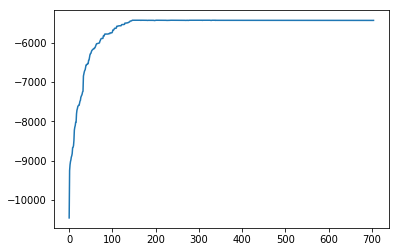

In [62]:
plt.plot(range(len(ll_history2)), ll_history2);

In [63]:
decoded2 = apply_permutation(ru_text_encoded2, ru_alphabet, best_permutation2)

In [65]:
print(accuracy(decoded2, ru_text2))
decoded2

0.792016806722689


' верьте оль не верьте о фил но белам свете жедат стрелец удолай маладец был жедат ни кросовец ни урад ни румян ни бледен ни базот ни беден ни в порше ни в порче о ток ваабче слуфбо у жедато рыболко до ахато цорю дичь до рыбо жедату спосиба застей ва дварце кок семян в азурце адин иг швеции друзай иг зреции третий с зовой и всем фроть падовой аднаму аморав друзаму кольморав третьему сордин о дабытчик адин кок та рог доют ему приког чуть свет паутру явиться ка двару цорь но вид смарчак бошко с кулочак о глабнасти в ем озрамодный абщем сматрит но жедьку кок ягвенник но редьку но жедьке ат строхо номакло рубохо в вискох гостучола в пуге гоурчола тут кок заварится и скогке ночола к ном но утренний россал прибыл озлицкий пасал о у нос в даму гокуски палзарбушки до масал сноряфойся бротец в путь до сщестназа ном дабудь злухоря оль курапотку оль иша каза нибудь не смазешь каза винить я далфан тебя когнить засудорственнае дела ты уловливоешь нить '

Уже хуже, но в целом прочитать текст можно

## Непляшущие стрелочки
Попробуем расшифровать загадочное сообщение из стрелочек тем же самым алгоритмом. Чтобы его можно было применить, нужно перевести стрелочный алфавит в кириллицу (если, конечно, оригинальное сообщение на русском)

In [40]:
message = """←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"""

In [41]:
message_alphabet = ''.join(sorted(set(message)))
len(message_alphabet)

28

In [42]:
ru_message = apply_permutation(message, message_alphabet, ru_alphabet[:len(message_alphabet)])
ru_message

' фрдйинйидедё йвтхзчрмвнкйдрдйштуёдйвтхзчрмвнкйё офёйсйщётбтйфттжл вдгйотётхнкйр ботйшхтудёчёмйфотх  йиф бтйинйиф йфе рчрдйшхчидрмвтйдйштрсудё йзчофдзчрмвнкйжчррйцчйштфр ев  йу ёи хёт йцчечвд йосхфчйатёгйотв увтйгйвду бтйв йтж лчп'

In [59]:
best_permutation, ll_history = mcmc(ru_message, ru_stat, ru_alphabet, n_iter=20000)

Initial permutation "зфйждъвбтгёхацщпср ыоянуэчекилшмюь" with log-likelihood -2503.79450
4: found new best permutation "зфйждъвстгёхацщпбр ыоянуэчекилюмшь" with log-likelihood -2491.63328
5: found new best permutation "зфйждмвстгёхацщпбр ыоянуэчекилюъшь" with log-likelihood -2383.78131
7: found new best permutation "зшйждмвстгёхацщпбр ыоянуэчекилюъфь" with log-likelihood -2379.86185
9: found new best permutation "зшйыдмвстгёхацщпбр жоянуэчекилюъфь" with log-likelihood -2360.15266
10: found new best permutation "зшйыдувстгёхацщпбр жоянмэчекилюъфь" with log-likelihood -2308.80576
13: found new best permutation "зшйыдувстгёлацщпбр жоянмэчекихюъфь" with log-likelihood -2069.86164
16: found new best permutation "зшйыдувстгэлацщпбр жоянмёчекихюъфь" with log-likelihood -2062.05210
32: found new best permutation "ашйыдувстгэлзцщпбр жоянмёчекихьъфю" with log-likelihood -2037.40747
47: found new best permutation "ашйыдувстгзлэцщпбр жоянмёчекихьъфю" with log-likelihood -2002.86750
49: found new b

2265: found new best permutation "ефхняишдгкв мчьылжтуобсрзапэъёцйщю" with log-likelihood -1303.91099
2274: found new best permutation "ефхняишдгкв йчьылжтуобсрзапэъёюмщц" with log-likelihood -1303.65893
2350: found new best permutation "ефмняишдгкв йчьылжтуобсрзапэёхюцщъ" with log-likelihood -1295.34135
2354: found new best permutation "ефгняишдмкв йчьылжтуобсрзапэёхюцщъ" with log-likelihood -1286.91530
2472: found new best permutation "ефгняимтжкв йчьылшдуобсрзапэцхюёщъ" with log-likelihood -1280.59144
2589: found new best permutation "ешгняимтжкв йчьылфдуобсрзапэъёщцхю" with log-likelihood -1279.93909
2654: found new best permutation "ешгняимджкв йчьылфтуобсрзапэёъхцщю" with log-likelihood -1278.79303
2772: found new best permutation "ешгняимджкв йчьытюлуобсрзапхцёъщэф" with log-likelihood -1278.13688
2827: found new best permutation "ешгняимджкв йчьытюлуобсрхапзщёцъэф" with log-likelihood -1275.42939
3090: found new best permutation "ехгняимджкв йчьытюлуобсршапзёщцфэъ" with log-lik

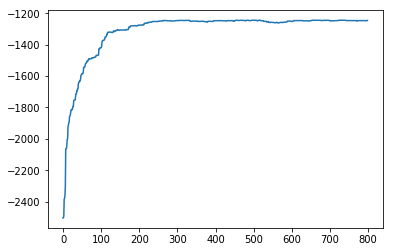

In [60]:
plt.plot(range(len(ll_history)), ll_history);

In [61]:
decoded_message = apply_permutation(ru_message, ru_alphabet, best_permutation)

In [62]:
decoded_message

'если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаж'